### Title: Data exploration
### Author: Agnes Piecyk
### Content: !!! Work in progress!!! (1) imports data from 0_DataPreparation (2) feature engineering (3) data exploration

In [14]:
# import libraries
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt # library for data visualization
from scipy import stats # library for statistical tests


In [15]:
# import merged_data.csv from 0_DataPreparation
df = pd.read_csv('/workspaces/bakery_prediction_data_science_and_ml/0_DataPreparation/merged_data_withoutNaN.csv')

## inspect data
print(df.head())

        Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0  2013-07-01            1  148.828353         6.0     17.8375   
1  2013-07-03            1  111.885594         7.0     21.0750   
2  2013-07-04            1  168.864941         7.0     18.8500   
3  2013-07-08            1  135.500244         0.0     22.7250   
4  2013-07-10            1  135.132314         2.0     19.6875   

   Windgeschwindigkeit  Wettercode  KielerWoche  
0                   15        20.0            0  
1                    6        61.0            0  
2                    7        20.0            0  
3                   10         5.0            0  
4                   13         5.0            0  


In [16]:
# Working with the "Datum" data - first feature engineering

## Convert the date column to datetime
df["Datum"] = pd.to_datetime(df["Datum"])
## Create a new column for the day of the week
df["Wochentag"] = df["Datum"].dt.day_name()
## Create a new column for the month
df["Monat"] = df["Datum"].dt.month_name()
## Create a new column for the year
df["Jahr"] = df["Datum"].dt.year

In [17]:
# check the new dataframe
print(df.head())
print(df.info)

       Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0 2013-07-01            1  148.828353         6.0     17.8375   
1 2013-07-03            1  111.885594         7.0     21.0750   
2 2013-07-04            1  168.864941         7.0     18.8500   
3 2013-07-08            1  135.500244         0.0     22.7250   
4 2013-07-10            1  135.132314         2.0     19.6875   

   Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag Monat  Jahr  
0                   15        20.0            0     Monday  July  2013  
1                    6        61.0            0  Wednesday  July  2013  
2                    7        20.0            0   Thursday  July  2013  
3                   10         5.0            0     Monday  July  2013  
4                   13         5.0            0  Wednesday  July  2013  
<bound method DataFrame.info of           Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0    2013-07-01            1  148.828353         6.0     17.8375   
1  

In [18]:
# Further data exploration

## check occurences of each value in the column "Warenguppe"
print(df["Warengruppe"].value_counts()) # Warengruppe "6" ("Saisonbrot") and "4" ("Konditorei") have fewer occurences than the rest

## check occurences of each value in the column "Bewoelkung"
print(df["Bewoelkung"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Windgeschwindigkeit"
print(df["Windgeschwindigkeit"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wettercode"
print(df["Wettercode"].value_counts()) # values should be grouped into fewer categories

## check occurences of each value in the column "Wochentag"
print(df["Wochentag"].value_counts())

## check occurences of each value in the column "Monat"
print(df["Monat"].value_counts())

## check occurences of each value in the column "Jahr"
print(df["Jahr"].value_counts())

Warengruppe
1    1360
2    1360
3    1360
5    1360
4    1323
6     246
Name: count, dtype: int64
Bewoelkung
7.0    2688
6.0    1076
5.0     664
8.0     600
0.0     583
4.0     474
3.0     349
2.0     289
1.0     286
Name: count, dtype: int64
Windgeschwindigkeit
10    850
8     712
9     679
12    659
7     557
11    497
13    415
6     405
15    382
14    322
16    311
5     247
18    208
17    174
4     149
19    129
20     98
21     61
24     42
23     30
22     19
25     17
3      16
29     15
28     10
35      5
Name: count, dtype: int64
Wettercode
61.0    2271
21.0    1013
0.0      815
10.0     742
5.0      562
63.0     535
20.0     244
95.0     137
65.0     111
45.0      96
22.0      88
71.0      81
28.0      63
49.0      48
73.0      48
77.0      45
53.0      31
69.0      27
75.0      25
68.0      12
79.0       5
3.0        5
17.0       5
Name: count, dtype: int64
Wochentag
Saturday     1029
Tuesday      1017
Friday       1012
Thursday     1000
Sunday        998
Wednesday     9

In [19]:
## Investigate in which months "Warengruppe" "6" ("Saisonbrot") has been sold
print(df[df["Warengruppe"] == 6]["Monat"].value_counts()) # "Saisonbrot" wird hauptsächlich im Winter verkauft

Monat
December    120
November    112
October       9
January       5
Name: count, dtype: int64


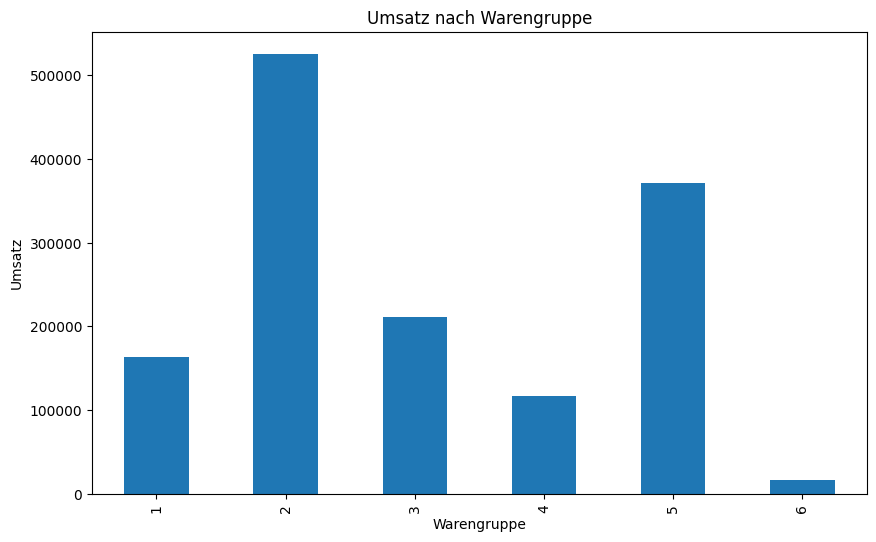

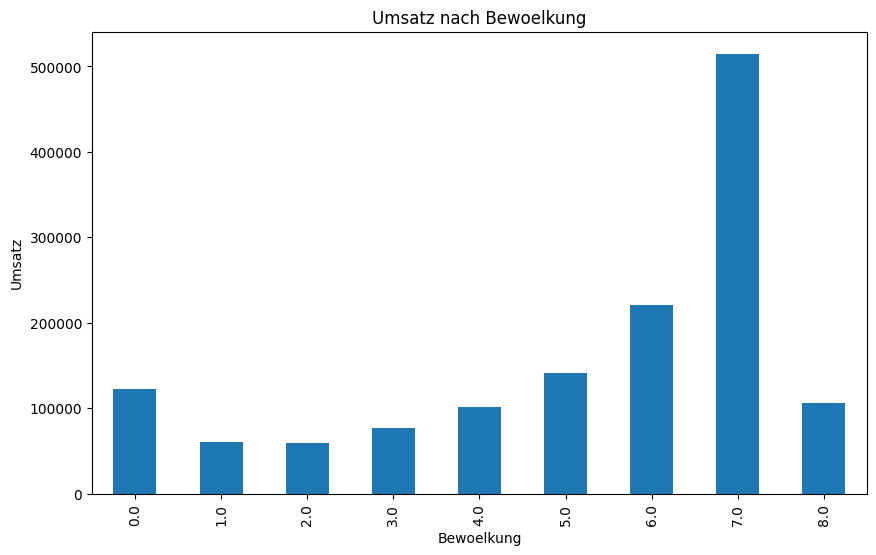

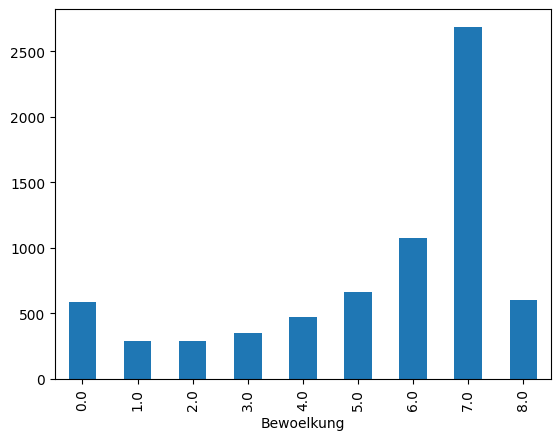

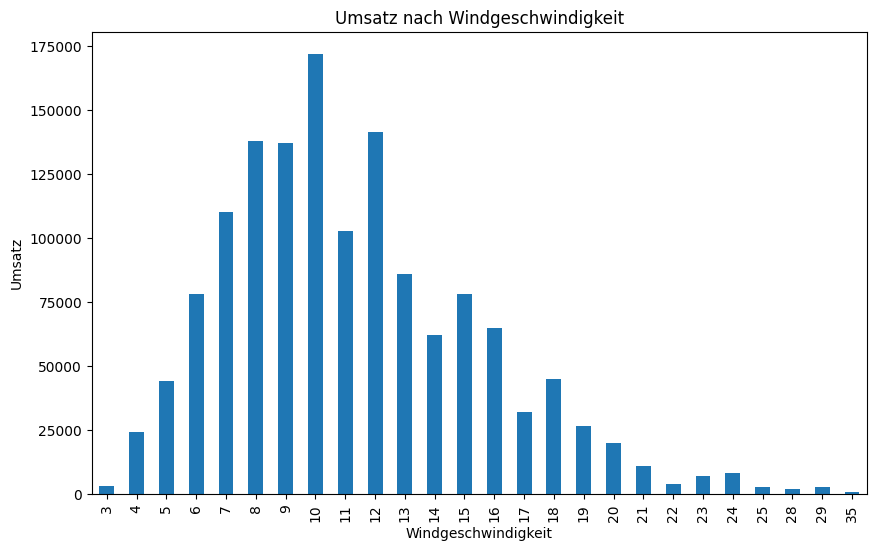

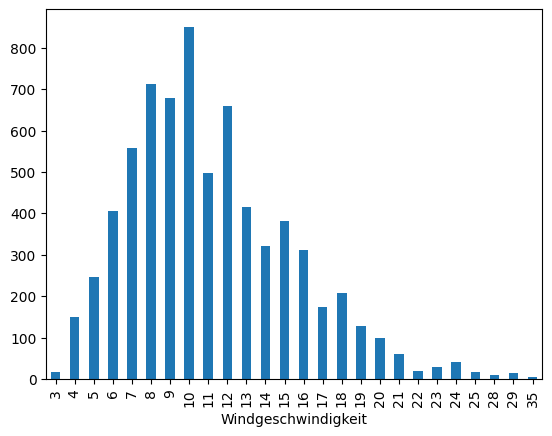

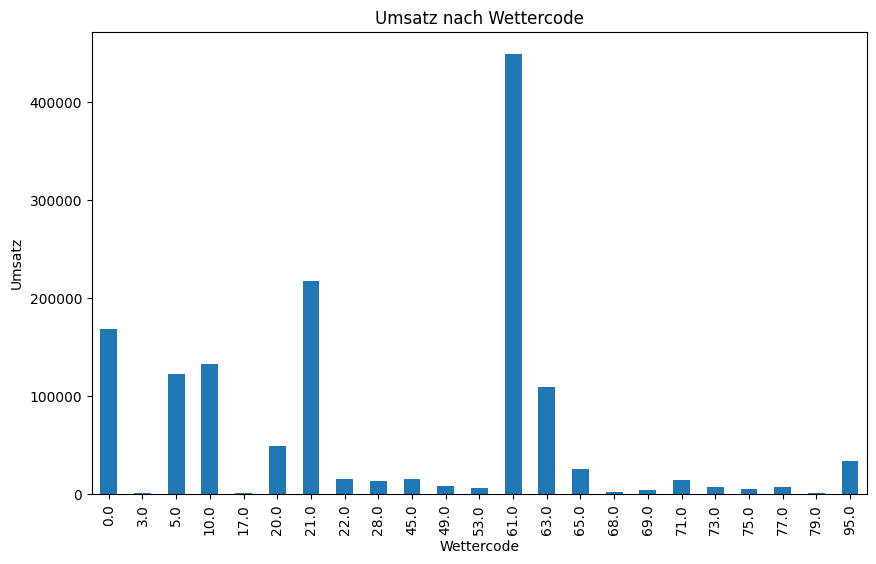

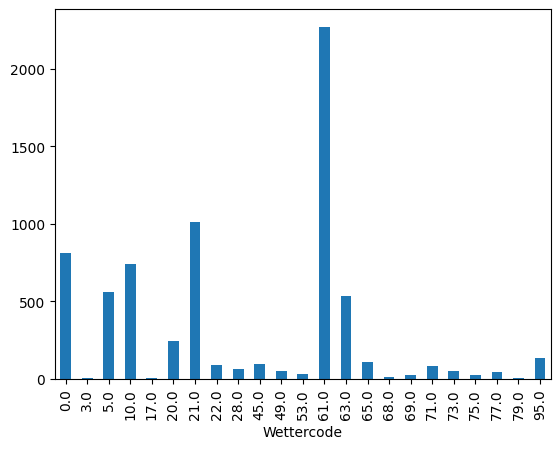

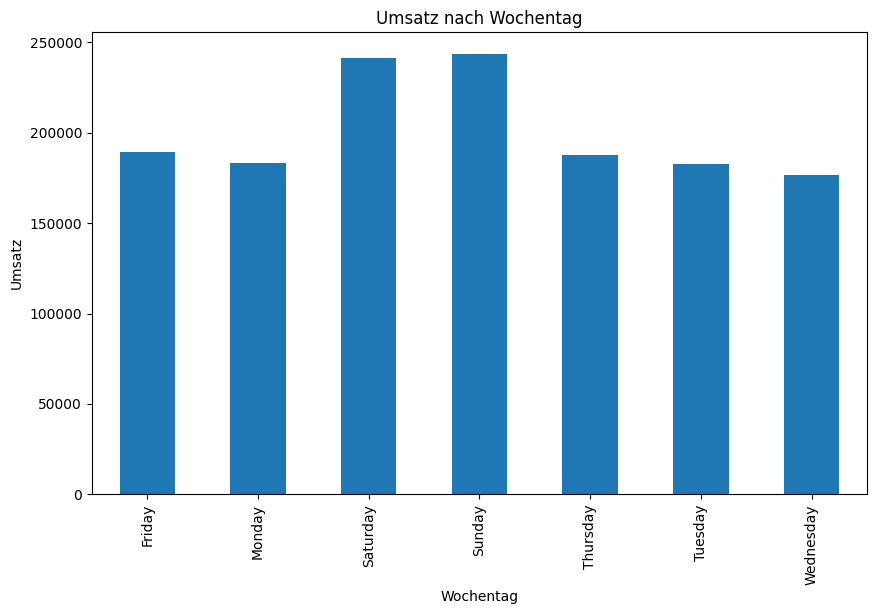

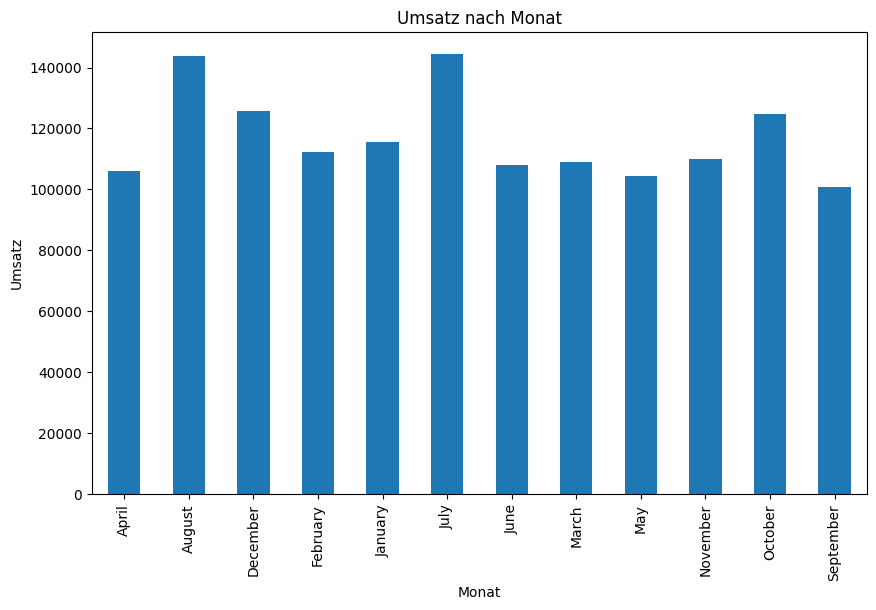

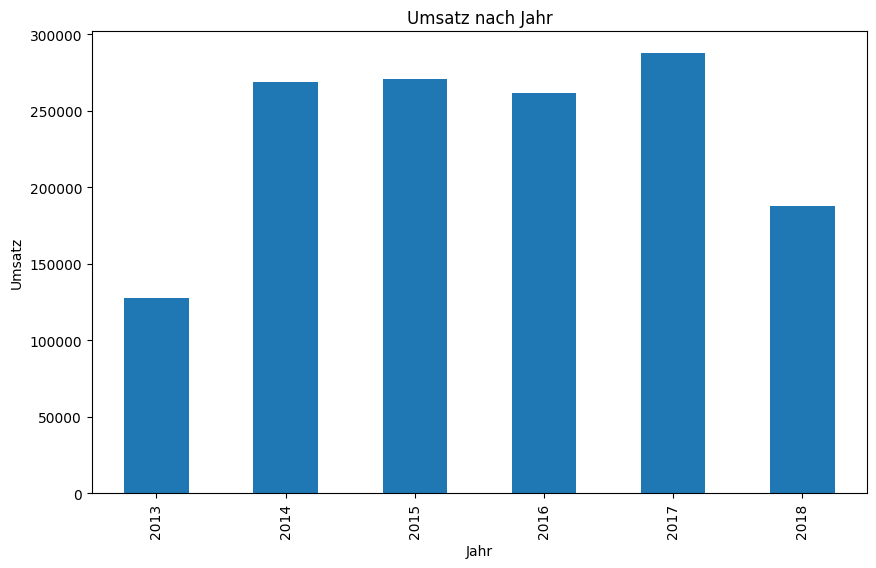

In [20]:
# data visualization

## plot "Umsatz" according to "Warengruppe"
plt.figure(figsize=(10,6))
df.groupby("Warengruppe")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Warengruppe")
plt.xlabel("Warengruppe")
plt.ylabel("Umsatz")
plt.show()

## plot "Umsatz" according to "Bewoelkung"
plt.figure(figsize=(10,6))
df.groupby("Bewoelkung")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Bewoelkung")
plt.xlabel("Bewoelkung")
plt.ylabel("Umsatz")
plt.show()
### die Bewölkung beeinflusst vermutlich nicht das Kaufverhalten der Kunden; in Kiel ist es einfach meist bewölkt
## plot occurences of "Bewoelkung" and order the values ascending
df["Bewoelkung"].value_counts().sort_index().plot(kind="bar")
### die Häufigkeit der Werte für "Bewoelkung" korreliert mit dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

### "Temperatur" muss zunächst gebinnt werden, um die Korrelation mit "Umsatz" zu untersuchen; ggfs. gibt es hier einen Interaktoinseffekt

## plot "Umsatz" according to "Windgeschwindigkeit"
plt.figure(figsize=(10,6))
df.groupby("Windgeschwindigkeit")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Windgeschwindigkeit")
plt.xlabel("Windgeschwindigkeit")
plt.ylabel("Umsatz")
plt.show()
## plot occurences of each value in the column "Windgeschwindigkeit" and order the values ascending
df["Windgeschwindigkeit"].value_counts().sort_index().plot(kind="bar")
### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

## plot "Umsatz" according to "Wettercode"
plt.figure(figsize=(10,6))
df.groupby("Wettercode")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wettercode")
plt.xlabel("Wettercode")
plt.ylabel("Umsatz")
plt.show()
## plot occurences of each value in the column "Wettercode" and order the values ascending
df["Wettercode"].value_counts().sort_index().plot(kind="bar")
### auch hier gibt es eine Korrelatoin zwischen der Häufigkeit der Windgeschwindigkeiten und dem Umsatz --> vermutlich eine Korrelation und keine Kausalität

## plot "Umsatz" according to "Wochentag" and order from "Monday" to "Sunday"
#df["Wochentag"] = pd.Categorical(df["Wochentag"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
plt.figure(figsize=(10,6))
df.groupby("Wochentag")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Umsatz")
plt.show()
### die Umsätze scheinen am Wochenende am höchsten zu sein

## plot "Umsatz" according to "Monat"
plt.figure(figsize=(10,6))
df.groupby("Monat")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Monat")
plt.xlabel("Monat")
plt.ylabel("Umsatz")
plt.show()

## plot "Umsatz" according to "Jahr"
plt.figure(figsize=(10,6))
df.groupby("Jahr")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Jahr")
plt.xlabel("Jahr")
plt.ylabel("Umsatz")
plt.show()


Bewoelkung_binned
stark_bewoelkt     2688
wolkig             2214
bedeckt             600
wolkenlos           583
heiter              575
leicht_bewoelkt     349
Name: count, dtype: int64
       Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0 2013-07-01            1  148.828353         6.0     17.8375   
1 2013-07-03            1  111.885594         7.0     21.0750   
2 2013-07-04            1  168.864941         7.0     18.8500   
3 2013-07-08            1  135.500244         0.0     22.7250   
4 2013-07-10            1  135.132314         2.0     19.6875   

   Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag Monat  ...  \
0                   15        20.0            0     Monday  July  ...   
1                    6        61.0            0  Wednesday  July  ...   
2                    7        20.0            0   Thursday  July  ...   
3                   10         5.0            0     Monday  July  ...   
4                   13         5.0            0  Wednesd

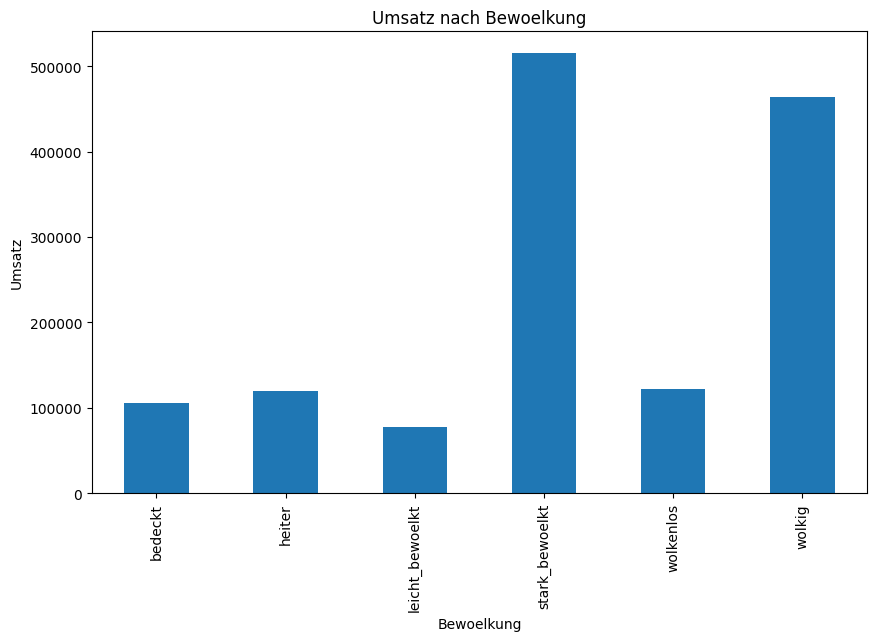

          Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0    2013-07-01            1  148.828353         6.0     17.8375   
1    2013-07-03            1  111.885594         7.0     21.0750   
2    2013-07-04            1  168.864941         7.0     18.8500   
3    2013-07-08            1  135.500244         0.0     22.7250   
4    2013-07-10            1  135.132314         2.0     19.6875   
...         ...          ...         ...         ...         ...   
7004 2017-12-21            6   87.471228         7.0      6.2375   
7005 2017-12-22            6   71.911652         7.0      5.7625   
7006 2017-12-23            6   84.062223         7.0      7.8000   
7007 2017-12-24            6   60.981969         7.0      8.1125   
7008 2017-12-27            6   34.972644         7.0      4.6125   

      Windgeschwindigkeit  Wettercode  KielerWoche  Wochentag     Monat  ...  \
0                      15        20.0            0     Monday      July  ...   
1                      

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [28]:
# Grouping values in the column "Bewoelkung" into fewer categories: binning and one-hot encoding
## Bewoelkung: "0" = "wolkenlos"; "1-2" = "heiter", "3" = "leicht bewoelkt", "4-6" = "wolkig", "7" = "stark bewökt", "8" = "bedeckt"

## define a function for binning the values in the column "Bewölkung"
def binning_bewoelkung(x):
    if x == 0:
        return "wolkenlos"
    elif x in [1, 2]:
        return "heiter"
    elif x == 3:
        return "leicht_bewoelkt"
    elif x in [4, 5, 6]:
        return "wolkig"
    elif x == 7:
        return "stark_bewoelkt"
    elif x == 8:
        return "bedeckt"
    else:
        return "unknown"
    
## Apply the function to create a new column "Bewoelkung_binned"
df["Bewoelkung_binned"] = df["Bewoelkung"].apply(binning_bewoelkung)

## check occurences of each value in the column "Bewoelkung_binned"
print(df["Bewoelkung_binned"].value_counts())
print(df.head())

## plot "Umsatz" according to "Bewoelkung_binned"
plt.figure(figsize=(10,6))
df.groupby("Bewoelkung_binned")["Umsatz"].sum().plot(kind="bar")
plt.title("Umsatz nach Bewoelkung")
plt.xlabel("Bewoelkung")
plt.ylabel("Umsatz")
plt.show()

## one-hot-encoding of the binned values in the column "Bewoelkung_binned" with values 0 and 1
df = pd.get_dummies(df, columns=["Bewoelkung_binned"], drop_first=True, prefix="", prefix_sep="")
print(df) ### new columns have boolean values and need to be converted to integer values

## convert only boolean columns to integers
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)  # Convert boolean to integers
print(df)


In [22]:
# Grouping values in the column "Windgeschwindigkeit" into fewer categories: binning and one-hot encoding
## Windgeschwindigkeit: "0-3" = "Sille bis leiser Zug", "4-6" = "leichte Brise",  "7-10" = "schwache Brise", "11-16" = "mäßige Brise", "17-21" = "frische Brise", "22-35" "starker Wind"


